<a href="https://colab.research.google.com/github/valenciajaime/GCoupling_v0/blob/master/Colab_Ejemplos/Copy_of_GCoupling_Fig43book_2022_ago_02_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PORTADA (Gtierras)

Programa Coupling

Calculo de Sistemas de puesta a tierra.


Lenovo: Software_Coupling_2021

[Codigo En GitHub](https://github.com/valenciajaime/GCoupling_v0) Descargar modulo

[Paper Otero 1999](https://drive.google.com/file/d/1txaW0pMyonRAgEmT0E7t639PHU6dG-Eb/view?usp=sharing)

[Presentacion Coupling_Mod_GT07](https://docs.google.com/presentation/d/1N7nQ4oziwy3Nz3X21yOdRVkTiQkco0m-/edit?usp=sharing&ouid=115596684584813514481&rtpof=true&sd=true)


Autores: German Moreno, Carlos Cardenas, Hector D, Gomez, Walter M. Villa, Jaime A. Valencia.


Fecha: 2022-agost-02 Martes


Modulos que se deben cargar:

Modulo_GT07.py (Modulo actualizado a 2 de agosto de 2022). Revision funcion de lectura



# Descripcion

**Objetivo:**

Reproducir casos para el libro de tierras. Este es el caso de la figura 4.3.

Malla en archivo: figura4_3_r1.csv
Se asumen radio de conductor(0.012) y conductividad (4545454.54).
Resistividad 100 Ohm-m.




[libro Capitulo 4](https://docs.google.com/document/d/1lzkIKQoMII6ABE0-Utjo9XODYbw3BLHS/edit)

# Importacion de modulos

In [ ]:
#importaciones
import os 
import numpy as np # entorno similar a Matlab
import matplotlib.pyplot as plt 
import matplotlib #ayuda matplotlib galery

#caso 
from scipy import optimize as OP
from scipy import integrate as IT
from Modulo_GT07 import *



# Caso: Malla fig 4-3

In [ ]:
help(SPT_01)

Figura 4.3 libro




In [ ]:
### CODIGO PPAL############Tiempo ejecucion: 2m 25s
# Clase SPT_01()
# SPT_01(freq, ro=100, er=15, Kp=0, seg_i=4, K_zi=0, K_fr=0)
#        freq: frecuencia en Hz
#        ro: resistividad de tierra en ohms-m
#        er: permitividad electrica relativa
#        Kp: constante de propagacion
#        seg_i: segmentos de integracion numerica
#        K_zi: 0 sin calculo de impedancia conductor
#              1 con calculo de impedancia conductor
#        K_fr: 0 parametros no dependientes de la frecuencia

S1 = SPT_01(60, ro=100.0, er=15, Kp=0, seg_i=40, K_zi=1, K_fr=1)#Parametros SPT

##Datos conductores STP
##asumimos segmentos de 2 metros
#ps=35 # particion 0- minima posible,  1 maxima posible, Mayor 1==numero segmentos

#Formato de datos conductor
#Ad = [Pi_x, Pi_y, Pi_z, Pf_x, Pf_y, Pf_z, Radioconduc, conductancia]
#Conductancia = 4545454.54

####ediciones conductores [x1,y1,z1,x2,y2,z2, conductancia]
### z: profundidad positiva cuando esta enterrado
### Se asume un valor CUALQUIERA del radio del conductor.
#Ad1 = [0,0,0.5,0,70,0.5,0.012, Conductancia]#conductor 1
S1.Read_spt01("figura4_3_r1.csv")
#####  fin edicion
#print("Datos leidos: \n",Ad1) #formato: Pi(x,y,z), Pf(x,y,z), Radio; conductividad

#S1.Add_conduct([Ad1],ps) #funcion para adicionar conductores

print("\nClase Sistema de Puesta a Tierra: \n",S1)



Clase Sistema de Puesta a Tierra: 
 Instancia clase SPT_01
Archivo datos: Ninguno
Total Conductores: 64
Numero Nodos: 104
Numero Ramas: 128


Nodo origen:  78  
Coord:  (10.0, 10.0, 0.5)


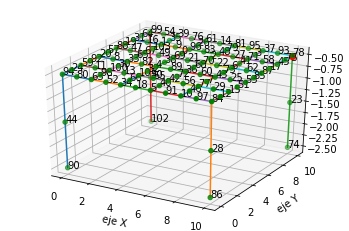

In [ ]:
##visualiza nodos en conductor

# 70 (6.0, 6.0, 0.5) Libro Nodo 3
# 87 (10.0, 6.0, 0.5) Libro Nodo 2
# 5 (6.0, 0.0, 0.5) libro Nodo 5
# 84 (10.0, 0.0, 0.5) Libro Nodo 4
# 94 (0.0, 0.0, 0.5) Libro Nodo 6
# 78 (10.0, 10.0, 0.5) Libro Nodo 1

Nodo_Ic = 78
print("Nodo origen: ",Nodo_Ic," \nCoord: ",S1.L_nodos[Nodo_Ic])

S1.Show_nodos(Nodo_Ic)

# Calculo Zt (Solve_SPT01)

In [ ]:
#se define la clase solucion con argumento el sistema
# de puesta a tierra S1
S_S1 = Solve_SPT01(S1)#clase solucion sistema puesta a tierra
print("Objeto S_S1: ",S_S1)

#calculo de impedancia de tierra una sola frecuencia

S_S1.Selec_cur(Nodo_Ic)#nodo de aplicacion de corriente
print("Frecuencia de calculo: ",S_S1.spt.freq)
print("Impedancia Tierra: ",round(S_S1.Zt_1f,5))

Objeto S_S1:  Clase solucion SPT
Z_tierra:  3.9815474147431673
Frecuencia de calculo:  60
Impedancia Tierra:  3.98155


# Grafico Magnitud Zt(f)

Graficos de Gtierras suministrados por Hector David el 11 de marzo del 2022.

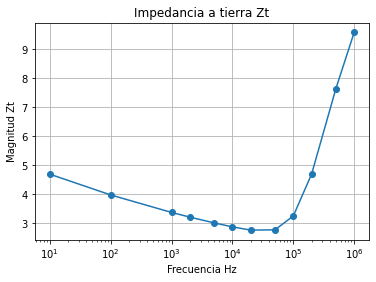

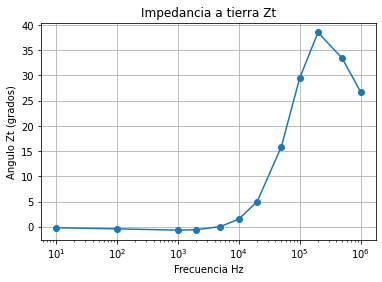

In [ ]:
#Calculo impedancia a tierra un vector
# se programa metodO en clase Solve_SPT
#def Show_Zt_Freq(self):


S_S1.Selec_cur1([1,1,1,1,1,1,1,1,1,1,1,1],[1e1,1e2,1e3,2e3,5e3,1e4,2e4,5e4,1e5,2e5,5e5,1e6],Nodo_Ic)
S_S1.Show_Zt_Freq()

In [ ]:
##Tabla de valores
print("==Freq===!=======Zt=======!====mag Zt=====")
for i,qz in enumerate(S_S1.HHz):
  
  s = "{:8.0f} !  {:7.4f} !   {:7.3f} !".format(qz,S_S1.ZZ[i],abs(S_S1.ZZ[i]))
  print(s)



==Freq===!=======Zt=======!====mag Zt=====
      10 !  4.6981-0.0159j !     4.698 !
     100 !  3.9819-0.0285j !     3.982 !
    1000 !  3.3783-0.0392j !     3.379 !
    2000 !  3.2169-0.0330j !     3.217 !
    5000 !  3.0178+0.0024j !     3.018 !
   10000 !  2.8794+0.0765j !     2.880 !
   20000 !  2.7577+0.2403j !     2.768 !
   50000 !  2.6724+0.7592j !     2.778 !
  100000 !  2.8339+1.6014j !     3.255 !
  200000 !  3.6770+2.9281j !     4.700 !
  500000 !  6.3814+4.2087j !     7.644 !
 1000000 !  8.5603+4.3185j !     9.588 !


# Generar señal  1.2/50

Generar señal de 1.2/50 en intervalo de 3 milisegundos. Usaremos nueva clase Signal_Gen01().

Creacion objeto Signal_Gen01
Datos para t(en MICROseg)
Error inicial:  0.004099987320727917
Error final:  0.0004392757135931095


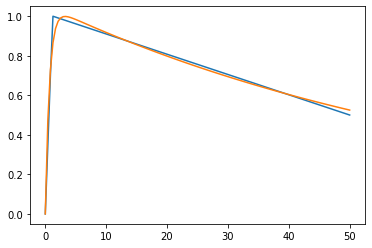

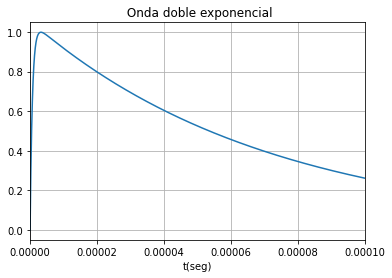

'Creado archivo datos Onda00.txt'

In [ ]:
#Señales generacion de señal
signal01 = Signal_Gen01()
signal01.Std2Dblexp(1.2,50)
signal01.Show_SamplEDbexp()
signal01.Make_file()


Numero de Muestras:  (260870, 2)
Atributos: T_onda, V_onda


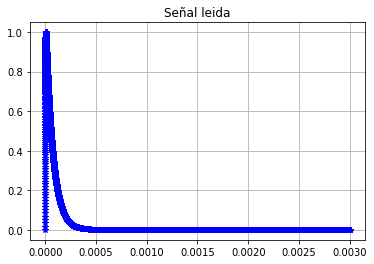

Tiempo final:  0.0029999935


In [ ]:
#señal de corriente de inyeccion
#tomar señal del archivo generado por la objeto signal01
S_S1.Read_signal01("Onda00.txt")
print("Tiempo final: ",S_S1.T_onda[-1])

# Respuesta en el tiempo

Nodo inyeccion I:  78
Nodo Observacion V:  78


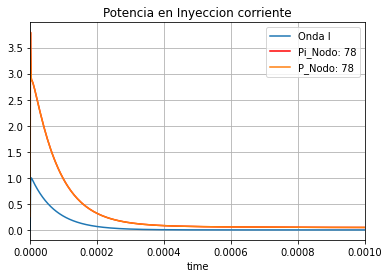

In [ ]:
S_S1.Get_Vtime(Nodo_Ic,[Nodo_Ic],t_sup= 1e-3)#S_S1.T_onda[-1]) 
#Nodo origen:  78  
#Coord:  (10.0, 10.0, 0.5)

#Datos Nodo inyeccion y nodos observacion 
#S_S1.V_t
#S_S1.Vver_t

Generando grafico en otros nodos:[78,87,70,84,5,94]
Nodo inyeccion I:  78
Nodo Observacion V:  78
Nodo Observacion V:  87
Nodo Observacion V:  70
Nodo Observacion V:  84
Nodo Observacion V:  5
Nodo Observacion V:  94


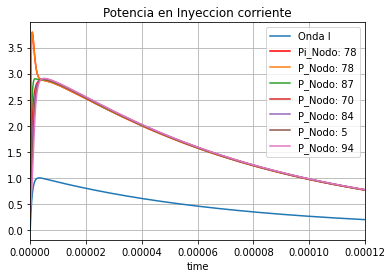

In [ ]:

#### Corresponde en libro a nodos 1,2,3,4,5,6
#####[78,87,70,84,5,94]

print("Generando grafico en otros nodos:[78,87,70,84,5,94]")

S_S1.Get_Vtime(Nodo_Ic,[78,87,70,84,5,94],t_sup= 12e-5)



# Resultados y conclusiones

**Resultados y analisis:**

GCoupling esta atenuando el sobre impulso usando impedancia interna y sin impedancia interna.







**Conclusiones:**




**Referencias:**